In [2]:
import pandas as pd 
unpickled_final_start_page_df = pd.read_pickle("./start_page.pkl")
unpickled_final_start_page_df.describe()


,Durations_spliced_int,Prices_spliced_int,Title_word_length,Ratings_int,filled_na_Ratings_median,Title_character_count,Average_word_length
count,881.000000,881.000000,881.000000,558.000000,881.000000,881.000000,880.000000
mean,2.835414,70.564132,5.034052,4.939301,4.961555,28.286039,6.115637
std,1.841792,164.717743,1.686503,0.182673,0.148250,6.825247,2.475230
min,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000,2.400000
25%,2.000000,33.000000,4.000000,4.960000,5.000000,25.000000,4.833333
50%,2.000000,50.000000,5.000000,5.000000,5.000000,29.000000,5.666667
75%,3.000000,74.000000,6.000000,5.000000,5.000000,32.000000,6.800000
max,14.000000,4410.000000,20.000000,5.000000,5.000000,90.000000,31.000000


In [ ]:
unpickled_final_start_page_df[unpickled_final_start_page_df['Prices_spliced_int'] > 200]

In [ ]:
unpickled_individual_page_df = pd.read_pickle('./individual_pages.pkl')
deduplicated_unpickled_individual_page_df = unpickled_individual_page_df.drop_duplicates()
deduplicated_unpickled_individual_page_df


In [ ]:
unpickled_individual_page_df.duplicated('URLs').value_counts()

In [ ]:
deduplicated_unpickled_individual_page_df[deduplicated_unpickled_individual_page_df.duplicated('URLs', False) == True]

In [ ]:
dup_URLs = deduplicated_unpickled_individual_page_df[deduplicated_unpickled_individual_page_df.duplicated('URLs', False) == True]
dup_URLs['URLs']

In [ ]:
#drop_first = deduplicated_unpickled_individual_page_df.drop_duplicates('URLs', keep='first')
#drop_first

In [ ]:
#drop_last = deduplicated_unpickled_individual_page_df.drop_duplicates('URLs', keep='last')
#drop_last

In [ ]:
indexNames = deduplicated_unpickled_individual_page_df[deduplicated_unpickled_individual_page_df['Tags'] >= 30) & (dfObj['Country'] == 'India') ].index
 
dfObj.drop(indexNames , inplace=True)

In [ ]:
deduplicated_unpickled_individual_page_df['Tags'].value_counts()

In [ ]:
deduplicated_unpickled_individual_page_df[deduplicated_unpickled_individual_page_df['Tags'] == 7.0]

In [ ]:
#change tags 11 --> 4 
deduplicated_unpickled_individual_page_df.loc[:,['Tags']] = deduplicated_unpickled_individual_page_df.loc[:,['Tags']].replace(11.0, 4.0)

In [ ]:
print(deduplicated_unpickled_individual_page_df['Tags'].value_counts())
deduplicated_unpickled_individual_page_df
#['Tags'].value_counts()

In [ ]:
#change tags 9 --> 3 
deduplicated_unpickled_individual_page_df.loc[:,['Tags']] = deduplicated_unpickled_individual_page_df.loc[:,['Tags']].replace(9.0, 3.0)

In [ ]:
#change tags 7 --> 2 
deduplicated_unpickled_individual_page_df.loc[:,['Tags']] = deduplicated_unpickled_individual_page_df.loc[:,['Tags']].replace(7.0, 2.0)

In [ ]:
#change tags 5--> 1 
deduplicated_unpickled_individual_page_df.loc[:,['Tags']] = deduplicated_unpickled_individual_page_df.loc[:,['Tags']].replace(5.0, 1.0)

In [ ]:
deduplicated_unpickled_individual_page_df[deduplicated_unpickled_individual_page_df.duplicated('URLs', False) == True]

In [ ]:
#drop exact duplicates again
cleaned_deduplicated_unpickled_individual_page_df = deduplicated_unpickled_individual_page_df.drop_duplicates()

In [ ]:
cleaned_deduplicated_unpickled_individual_page_df[cleaned_deduplicated_unpickled_individual_page_df.duplicated('URLs', False) == True]

In [ ]:
#sort so I can drop the second duplicate
sorted_cleaned_deduplicated_unpickled_individual_page_df = cleaned_deduplicated_unpickled_individual_page_df.sort_values("Host_photos", ascending=False)
#sorted_cleaned_deduplicated_unpickled_individual_page_df[sorted_cleaned_deduplicated_unpickled_individual_page_df.duplicated('URLs', False) == True]

In [ ]:
fully_deduplicated_unpickled_individual_page_df = sorted_cleaned_deduplicated_unpickled_individual_page_df.drop_duplicates('URLs', keep='first')
fully_deduplicated_unpickled_individual_page_df

In [ ]:
#fully_deduplicated_unpickled_individual_page_df_GroupSize_strip_up_to = fully_deduplicated_unpickled_individual_page_df['GroupSize'].apply(lambda x: x.split('Up to ')[1])
fully_deduplicated_unpickled_individual_page_df_GroupSize_strip_string = fully_deduplicated_unpickled_individual_page_df['GroupSize'].str.extract('(\d+)', expand=False)
fully_deduplicated_unpickled_individual_page_df_GroupSize_strip_string

#add above column/series to dataframe
fully_deduplicated_unpickled_individual_page_df['GroupSize_strip_string'] = fully_deduplicated_unpickled_individual_page_df_GroupSize_strip_string

fully_deduplicated_unpickled_individual_page_df
#df[df['EPS'].notnull()]
#fully_deduplicated_unpickled_individual_page_df = fully_deduplicated_unpickled_individual_page_df_GroupSize_string_up_to[fully_deduplicated_unpickled_individual_page_df_GroupSize_string_up_to['GroupSize'].notnull()]
#

#fully_deduplicated_unpickled_individual_page_df['GroupSize_strip_string'].isna()


In [ ]:
dropna_GroupSize = fully_deduplicated_unpickled_individual_page_df
dropna_GroupSize[dropna_GroupSize['GroupSize_strip_string'].notnull()]

In [ ]:
dropna_GroupSize.info()

In [ ]:
#replace remaining nulls with zeros
filledna = dropna_GroupSize.fillna(0)

In [ ]:
filledna[filledna['GroupSize_strip_string'] == 0]

In [ ]:
#can't find any information from start page df or click back into this page: https://www.airbnb.com/experiences/1030435?location=crafts%20classes&source=p2 --so we're going to drop it 
drop_blank = filledna.drop(filledna[filledna['URLs'] == 'https://www.airbnb.com/experiences/1030435?location=crafts%20classes&source=p2'].index)
drop_blank

In [ ]:
split_language = drop_blank['Languages'].str.strip('Languages:\n') 
split_language

In [ ]:
split_language = split_language.str.strip('Offered in') 
split_language

In [ ]:
split_language.value_counts()

In [ ]:
split_language = split_language.replace('English',1)
split_language = split_language.replace('Ko',1)
split_language = split_language.replace('Russ',1)
split_language = split_language.replace('French',1)
split_language = split_language.replace('Spanish',1)
split_language = split_language.replace('Germ',1)
split_language = split_language.replace('Port',1)
split_language = split_language.replace('Chinese (Simplified)',1)
split_language = split_language.replace('English and Spanish',2)
split_language = split_language.replace('English and French',2)
split_language = split_language.replace('English and Port',2)
split_language = split_language.replace('English and Ital',2)
split_language = split_language.replace('Spanish and French',2)
split_language = split_language.replace('Greek and English',2)
split_language = split_language.replace('Japanese and Ko',2)
split_language = split_language.replace('English and Swedish',2)
split_language = split_language.replace('German, English and Ital',3)
split_language = split_language.replace('German, English and French',3)
split_language = split_language.replace('English, Spanish and Ital',3)
split_language = split_language.replace('English, Spanish and French',3)
split_language = split_language.replace('English, Spanish, French and Ital',4)
split_language = split_language.replace('1',1)
split_language = split_language.replace('2',2)
split_language = split_language.replace('3',3)
split_language = split_language.replace('4',4)
split_language = split_language.replace('6',6)
#Setting the 26 "all languages welcome" values to 6 because median is 1 and average is close to 1, but Airbnb technically offers hosts the chance to tag up to 30 languages--which would be an extreme outlier
split_language = split_language.replace('All languages welcom',6)
split_language.value_counts()

In [ ]:
drop_blank['Languages_cleaned'] = split_language
drop_blank.info()

In [ ]:
import numpy as np
drop_blank.replace('n/a',np.NaN, inplace=True)
drop_blank['GroupSize_strip_int'] = drop_blank['GroupSize_strip_string'].astype(int)
drop_blank.info()

In [ ]:
final_individual_page_df = drop_blank
picked_flinal_individual_page_df = final_individual_page_df.to_pickle("./final_individual_pages.pkl")

In [ ]:
unpickled_final_individual_page_df = pd.read_pickle("./final_individual_pages.pkl")

In [ ]:
unpickled_final_start_page_df

In [ ]:
cleaned_urls_start = unpickled_final_start_page_df['URLs'].apply(lambda x: x.split('?')[0])
cleaned_urls_individual = unpickled_final_individual_page_df['URLs'].apply(lambda x: x.split('?')[0])

In [ ]:
unpickled_final_start_page_df['URLs_cleaned'] = cleaned_urls_start
unpickled_final_start_page_df

unpickled_final_individual_page_df['URLs_cleaned'] = cleaned_urls_individual
unpickled_final_individual_page_df

In [3]:

#merged_df = unpickled_final_start_page_df.merge(unpickled_final_individual_page_df, how = 'inner', on='URLs_cleaned')
#merged_df.info()
#merged_df = merged_df.to_pickle("./merged_df.pkl")
merged_df = pd.read_pickle("./merged_df.pkl")

# Model by Rating

In [4]:
merged_df['Food'] = merged_df['Food'].fillna(0)
merged_df['Drinks'] = merged_df['Drinks'].fillna(0)
merged_df['Drinks'].value_counts()
#merged_df['Drinks'] = merged_df['Drinks'].fillna(merged_df['Drinks'].median())
#unpickled_start_page_replaced_nulls['filled_na_Ratings_median'] = unpickled_start_page_replaced_nulls['Ratings_int'].fillna(unpickled_start_page_replaced_nulls['Ratings_int'].median())

0.0    452
1.0    438
Name: Drinks, dtype: int64

In [5]:
merged_df

,URLs_x,Categories,Prices,Ratings,Durations,Titles,Ratings_spliced,Durations_spliced,Prices_spliced_from,Prices_spliced_person,...,URLs_y,Tags,GroupSize,Host_photos,Food,Drinks,Languages,GroupSize_strip_string,Languages_cleaned,GroupSize_strip_int
0,https://www.airbnb.com/experiences/223773?loca...,WORKSHOP,From $85/person,4.99\n203 reviews\n(203),From $85/person · 5 hours,Thai Traditional Yantra Tattoo.,4.99,5 hours,$85/person,$85,...,https://www.airbnb.com/experiences/223773?loca...,2.0,Up to 2 people,5,1.0,1.0,1,2,1,2
1,https://www.airbnb.com/experiences/358969?loca...,CRAFT CLASS,From $85/person,NaN,From $85/person · 2 hours,Try your hand at the Potters Wheel,NaN,2 hours,$85/person,$85,...,https://www.airbnb.com/experiences/358969?loca...,2.0,Up to 4 people,5,1.0,1.0,1,4,1,4
2,https://www.airbnb.com/experiences/1140666?loc...,CRAFT CLASS,From $28/person,5.0\n2 reviews\n(2),From $28/person · 2 hours,'Wooden ring' Making Class with Nice VIew,5.0,2 hours,$28/person,$28,...,https://www.airbnb.com/experiences/1140666?loc...,2.0,Up to 4 people,5,0.0,0.0,2,4,2,4
3,https://www.airbnb.com/experiences/522186?loca...,CRAFT CLASS,From $62/person,NaN,From $62/person · 9 hours,Build your own craft and furniture.,NaN,9 hours,$62/person,$62,...,https://www.airbnb.com/experiences/522186?loca...,0.0,Up to 10 guests ages 10 and up can attend.,2,1.0,0.0,Languages:\nOffered in English,10,1,10
4,https://www.airbnb.com/experiences/1005288?loc...,ART CLASS,From $160/person,NaN,From $160/person · 6 hours,Artistic Flow for your Inner Creative,NaN,6 hours,$160/person,$160,...,https://www.airbnb.com/experiences/1005288?loc...,3.0,Up to 6 people,5,0.0,1.0,1,6,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,https://www.airbnb.com/experiences/809698?loca...,CRAFT CLASS,From $9/person,5.0\n9 reviews\n(9),From $9/person · 1.5 hours,Learn How to Make Paper Flowers,5.0,1.5 hours,$9/person,$9,...,https://www.airbnb.com/experiences/809698?loca...,3.0,Up to 10 people,5,0.0,1.0,1,10,1,10
886,https://www.airbnb.com/experiences/1212487?loc...,PHOTO WALK,From $53/person,NaN,From $53/person · 2 hours,Private photoshoot in Wrocław,NaN,2 hours,$53/person,$53,...,https://www.airbnb.com/experiences/1212487?loc...,0.0,Up to 3 guests ages 2 and up can attend.,2,0.0,0.0,Languages:\nOffered in English,3,1,3
887,https://www.airbnb.com/experiences/987937?loca...,BOAT RIDE,From $80/person,5.0\n18 reviews\n(18),From $80/person · 6.5 hours,Découverte de la Camargue à la voile,5.0,6.5 hours,$80/person,$80,...,https://www.airbnb.com/experiences/987937?loca...,2.0,Up to 6 people,5,0.0,0.0,1,6,1,6
888,https://www.airbnb.com/experiences/278438?loca...,PERSONAL STYLING,From $104/person,4.94\n34 reviews\n(34),From $104/person · 4 hours,Get your K-style Hair Perm.,4.94,4 hours,$104/person,$104,...,https://www.airbnb.com/experiences/278438?loca...,1.0,Up to 3 people,5,1.0,1.0,1,3,1,3


In [6]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_character_count',axis=1).drop('filled_na_Ratings_median',axis=1), merged_df['filled_na_Ratings_median']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
print(X_train)



     Durations_spliced_int  Prices_spliced_int  Title_word_length  \
766                    2.0                  63                  6   
57                     2.0                  29                  6   
717                    2.0                  41                  5   
431                    3.0                  27                  5   
633                   12.0                 120                  3   
..                     ...                 ...                ...   
369                    3.0                  39                  6   
320                    6.0                 161                  4   
527                    3.0                 215                  5   
125                    3.0                  16                  7   
265                    3.0                  65                  5   

     Average_word_length  Tags  Host_photos  Food  Drinks  Languages_cleaned  \
766             5.833333   2.0            5   0.0     1.0                  2   
57         

In [7]:
lm_rating = LinearRegression()
lm_rating.fit(X_train,y_train)
print(f'Linear Regression val R^2 train: {lm_rating.score(X_train, y_train):.3f}')

Linear Regression val R^2 train: 0.009


In [8]:
y_predict = lm_rating.predict(X_test)
print(f'Linear Regression val R^2 test: {lm_rating.score(X_test, y_test):.3f}')

Linear Regression val R^2 test: -0.007


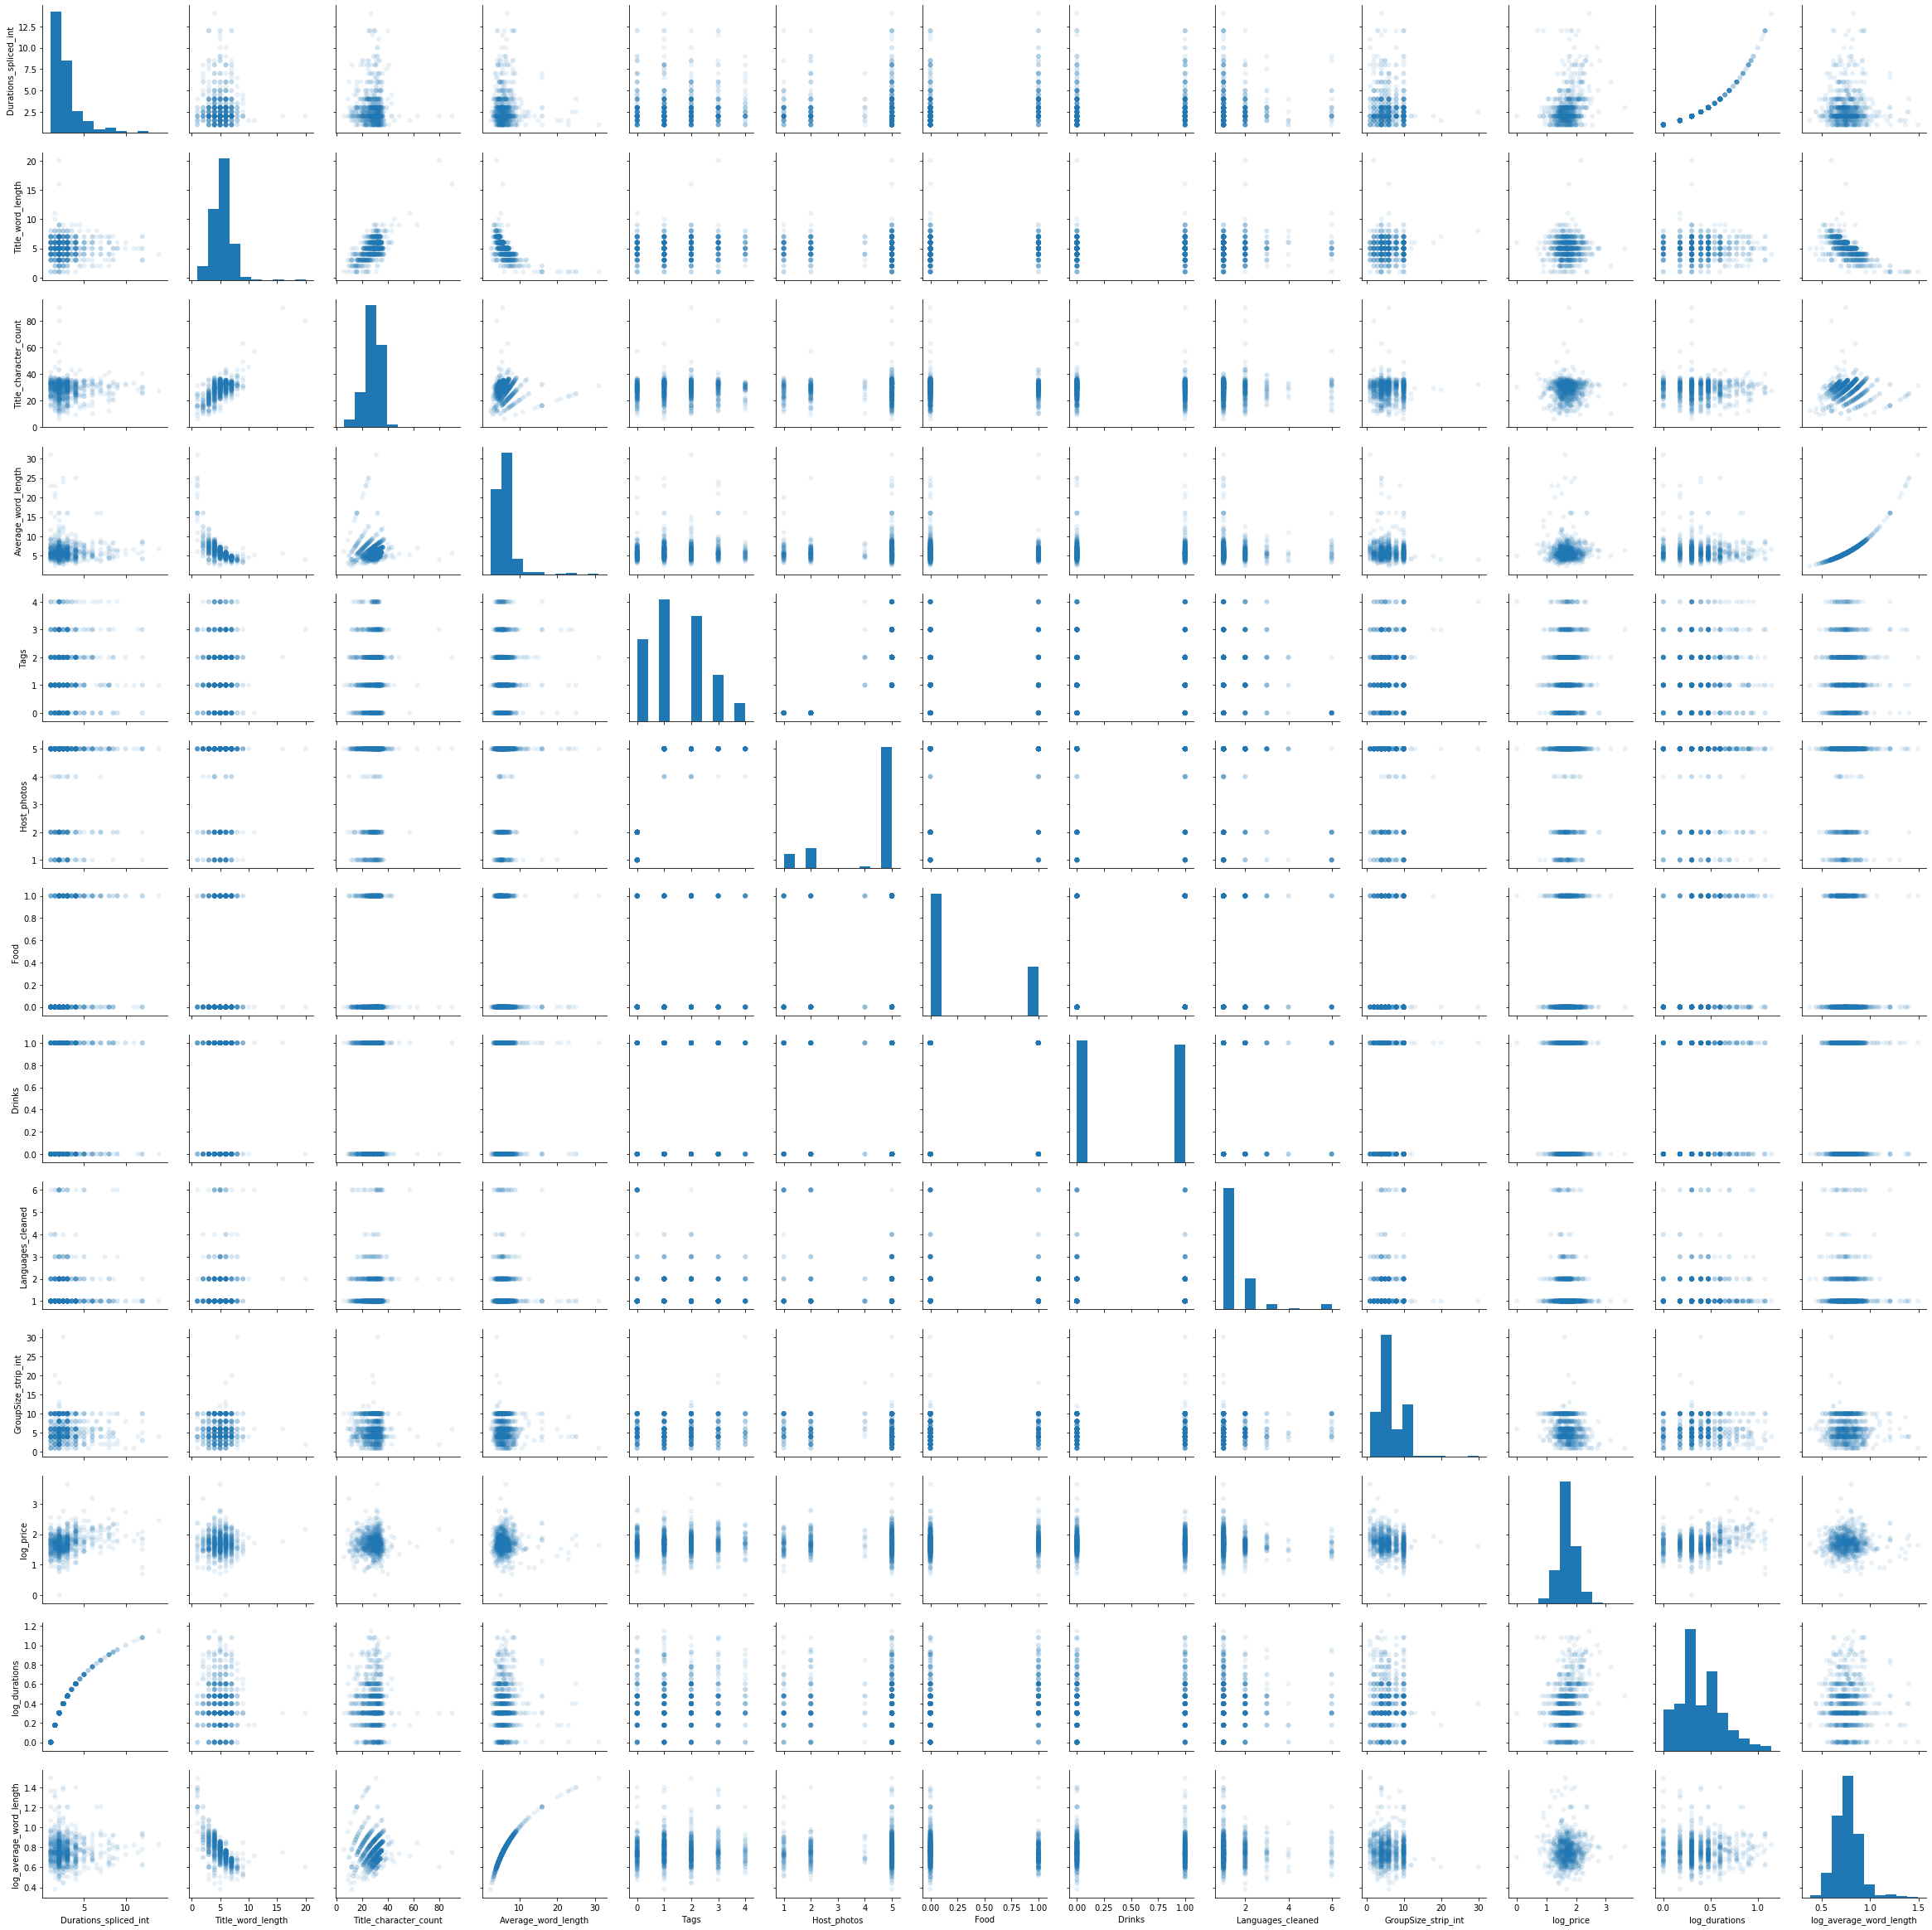

In [170]:
sns.pairplot(merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1), plot_kws=dict(alpha=.1, edgecolor='none'))

In [171]:
import heckman as heckman
res = heckman.Heckman(y_train, X_train,).fit(method='twostep')
print(res.summary())

#merged_df[merged_df['Ratings_int'] < 5]

ModuleNotFoundError: No module named 'heckman'

     Title_word_length  Ratings_int  Title_character_count  Tags  Host_photos  \
191                  7         5.00                     25   0.0            2   
255                  7         5.00                     32   2.0            5   
327                  6         5.00                     33   1.0            5   
358                  3         4.81                     24   1.0            4   
844                  3         5.00                     32   1.0            5   
..                 ...          ...                    ...   ...          ...   
604                  5         5.00                     31   3.0            5   
540                  5         4.93                     28   0.0            2   
840                  6         5.00                     33   1.0            5   
206                  5         5.00                     26   0.0            2   
448                  3         5.00                     18   1.0            5   

     Food  Drinks  GroupSiz

,URLs_x,Categories,Prices,Ratings,Durations,Titles,Ratings_spliced,Durations_spliced,Prices_spliced_from,Prices_spliced_person,...,Host_photos,Food,Drinks,Languages,GroupSize_strip_string,Languages_cleaned,GroupSize_strip_int,log_price,log_durations,log_average_word_length
0,https://www.airbnb.com/experiences/223773?loca...,WORKSHOP,From $85/person,4.99\n203 reviews\n(203),From $85/person · 5 hours,Thai Traditional Yantra Tattoo.,4.99,5 hours,$85/person,$85,...,5,1.0,1.0,1,2,1,2,1.929419,0.698970,0.829304
19,https://www.airbnb.com/experiences/340384?loca...,ART CLASS,From $44/person,3.0\n1 review\n(1),From $44/person · 3.5 hours,지리산 노을이 보이는 만다라작가의 작업실에서 만다라를 배워봅시다,3.0,3.5 hours,$44/person,$44,...,2,0.0,1.0,Languages:\nOffered in Korean,4,1,4,1.643453,0.544068,0.617300
20,https://www.airbnb.com/experiences/319392?loca...,ART CLASS,From $57/person,4.0\n1 review\n(1),From $57/person · 3 hours,Painting intro in artist studio,4.0,3 hours,$57/person,$57,...,1,1.0,0.0,Languages:\nOffered in English,2,1,2,1.755875,0.477121,0.732394
21,https://www.airbnb.com/experiences/497078?loca...,PHOTO CLASS,From $29/person,4.5\n2 reviews\n(2),From $29/person · 2 hours,Carcassonne New Town Photography Walk,4.5,2 hours,$29/person,$29,...,5,0.0,0.0,1,8,1,8,1.462398,0.301030,0.819544
27,https://www.airbnb.com/experiences/718947?loca...,PHOTO WALK,From $18/person,4.99\n75 reviews\n(75),From $18/person · 2.5 hours,Love Chefchaouen Tours,4.99,2.5 hours,$18/person,$18,...,5,0.0,1.0,1,10,1,10,1.255273,0.397940,0.823909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,https://www.airbnb.com/experiences/791999?loca...,PHOTO SHOOT,From $41/person,4.77\n30 reviews\n(30),From $41/person · 1.5 hours,Photo Shoot in Rome,4.77,1.5 hours,$41/person,$41,...,5,0.0,0.0,1,4,1,4,1.612784,0.176091,0.602060
882,https://www.airbnb.com/experiences/625735?loca...,WORKSHOP,From $112/person,4.8\n5 reviews\n(5),From $112/person · 3.5 hours,The Hands-on Perfume Experience,4.8,3.5 hours,$112/person,$112,...,5,1.0,0.0,1,8,1,8,2.049218,0.544068,0.845098
883,https://www.airbnb.com/experiences/849810?loca...,PHOTO CLASS,From $46/person,4.85\n13 reviews\n(13),From $46/person · 3 hours,Photo immersion in historic Gent,4.85,3 hours,$46/person,$46,...,5,0.0,0.0,3,6,3,6,1.662758,0.477121,0.748188
888,https://www.airbnb.com/experiences/278438?loca...,PERSONAL STYLING,From $104/person,4.94\n34 reviews\n(34),From $104/person · 4 hours,Get your K-style Hair Perm.,4.94,4 hours,$104/person,$104,...,5,1.0,1.0,1,3,1,3,2.017033,0.602060,0.643453


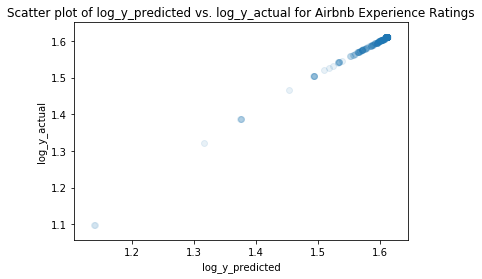

In [218]:
import matplotlib.pyplot as plt 
merged_df_log_ratings = merged_df.copy()
merged_df_log_ratings['log_ratings'] = np.log(merged_df['Ratings_int'])
merged_df_log_ratings_dropna = merged_df_log_ratings.dropna()
merged_df_log_ratings_dropna

X_ratings, y_ratings =  X, y =  merged_df_log_ratings_dropna.select_dtypes(exclude=['object']).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1).drop('Durations_spliced_int', axis=1).drop('Languages_cleaned', axis=1).drop('Average_word_length',axis=1).drop('log_price',axis=1).drop('log_ratings',axis=1), merged_df_log_ratings_dropna['log_ratings']

X_train_ratings, X_test_ratings, y_train_ratings, y_test_ratings = train_test_split(X_ratings, y_ratings, test_size=.2, random_state=10)
print(X_train_ratings)
print(y_train_ratings)

lm_ratings = LinearRegression()
lm_ratings.fit(X_train_ratings, y_train_ratings)
y_predict_ratings = lm_ratings.predict(X_train_ratings)
#y_predict_ratings = y_predict
#actual_ratings = y_test

plt.scatter(y_predict_ratings, y_train_ratings, alpha = 0.1)
plt.title('Scatter plot of log_y_predicted vs. log_y_actual for Airbnb Experience Ratings')
plt.xlabel('log_y_predicted')
plt.ylabel('log_y_actual');

print(f'Linear Regression val R^2 TRAIN ratings: {lm_ratings.score(X_train_ratings, y_train_ratings):.3f}')
print(f'Linear Regression val R^2 TEST ratings: {lm_ratings.score(X_test_ratings, y_test_ratings):.3f}')

# #rating_pipeline = make_pipeline(PolynomialFeatures(1), StandardScaler(), RidgeCV(cv=5,alphas=np.random.uniform(0,1,2)))
# rating_pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler(), LassoCV(cv=5,n_alphas=2))
# rating_pipeline_trained = rating_pipeline.fit(X_train_ratings,y_train_ratings)
# print(f'Pipeline val R^2 train: {rating_pipeline.score(X_train_ratings, y_train_ratings):.3f}')
# print(list(zip(X_train_ratings.columns, rating_pipeline.steps[2][1].coef_)))
# print(f'Pipeline alpha: {rating_pipeline.steps[2][1].alpha_:.3f}')
# print(rating_pipeline.steps[2][1].alphas)
# #print(len(lm_price_pipeline_trained.steps[2][1].alphas))
# #print(lm_price_polynom_two_lasso.steps[1][1].score(X_train,y_train))
# y_predict_pipeline_ratings = rating_pipeline.predict(X_train_ratings)
# print('MSE '+str(mean_squared_error(y_train_ratings, y_predict_pipeline_ratings)))
# #lm_price_pipeline.score(X_test,y_test)

# plt.scatter(y_predict_pipeline_ratings, y_train_ratings, alpha = 0.1)
# plt.title('Scatter plot of log_y_predicted_pipeline vs. log_y_actual for Airbnb Experience Ratings')
# plt.xlabel('log_y_predicted_pipeline')
# plt.ylabel('log_y_actual');

# resid_ratings = y_train_ratings - y_predict_pipeline_ratings



# Model By price

In [300]:
X, y =  merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_character_count',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1), merged_df['Prices_spliced_int']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)
print(X_train)

     Durations_spliced_int  Title_word_length  Average_word_length  Tags  \
2                      2.0                  7             5.000000   2.0   
555                    2.5                  4             6.250000   3.0   
633                   12.0                  3             8.666667   1.0   
789                    2.0                  5             6.200000   0.0   
577                    2.0                  3             8.000000   2.0   
..                     ...                ...                  ...   ...   
132                    2.0                  3             5.666667   3.0   
289                    5.0                  6             4.166667   1.0   
109                    3.0                  5             5.000000   2.0   
480                    4.0                  6             5.500000   2.0   
688                    2.0                  4             7.750000   0.0   

     Host_photos  Food  Drinks  Languages_cleaned  GroupSize_strip_int  \
2            

# PIPELINE

In [408]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


#, StandardScaler(),
lm_price_pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler(), RidgeCV(cv=5,alphas=(0.01,0.1,1,10,100,1000,10000)))
#lm_price_pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler(), LassoCV(cv=5,n_alphas=10))
lm_price_pipeline_trained = lm_price_pipeline.fit(X_train,y_train)
print(f'Pipeline val R^2 train: {lm_price_pipeline.score(X_train, y_train):.3f}')
print(list(zip(X_train.columns, lm_price_pipeline.steps[2][1].coef_)))
print(f'Pipeline alpha: {lm_price_pipeline.steps[2][1].alpha_:.3f}')
print(lm_price_pipeline.steps[2][1].alphas)
#print(len(lm_price_pipeline_trained.steps[2][1].alphas))
#print(lm_price_polynom_two_lasso.steps[1][1].score(X_train,y_train))
y_predict_pipeline_train = lm_price_pipeline_trained.predict(X_train)
y_predict_pipeline_test = lm_price_pipeline_trained.predict(X_test)
print('MSE '+str(mean_squared_error(y_train, y_predict_pipeline_train)))
#lm_price_pipeline.score(X_test,y_test)



Pipeline val R^2 train: 0.164
[('Title_character_count', 0.0), ('Tags', 0.007034390505423395), ('Host_photos', 0.0026786821836736496), ('Food', 0.0062264964249132545), ('Drinks', -0.005863198175397032), ('GroupSize_strip_int', -0.003118336444933356), ('log_durations', -0.018653363190368318), ('log_average_word_length', 0.01255402100045406)]
Pipeline alpha: 100.000
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
MSE 0.07872334481934262


/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline val R^2 test: 0.151


7288.070384048483

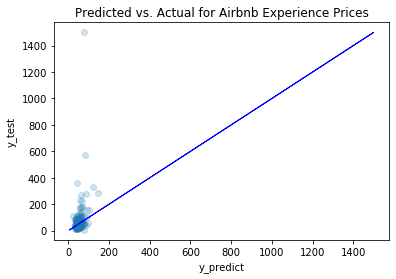

In [409]:
import matplotlib.pyplot as plt 
plt.scatter(10**(y_predict_pipeline_test), 10**(y_test), alpha = 0.2)
plt.title('Predicted vs. Actual for Airbnb Experience Prices')
plt.xlabel('y_predict')
plt.ylabel('y_test');
print(f'Pipeline val R^2 test: {lm_price_pipeline_trained.score(X_test, y_test):.3f}')
plt.plot(10**(y_test), 10**(y_test), color='blue',linewidth=1);


#looks almost completely independent; is this what we would expect intuitively? what else can we use? 

#if plot x's vs. residuals, see an effect? (ex. interaction)
#my model only explains 14% of the variation of the price

#underfitting because narrow range of y-predict values and not fitting the line 

sum_absolute_error = (abs(10**(y_test)-10**(y_predict_pipeline_test))).sum()
MAE = sum_absolute_error.mean()
MAE
#log transform --> 10^y (or e^y for natural log)
#MAE = mean absolute error: must take absolute value of errors and sum, then can say on average, off by $1000 

R^2 test: 0.151


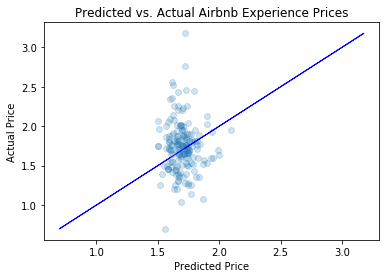

In [413]:
plt.scatter(y_predict_pipeline, y_test, alpha = 0.2)
plt.title('Predicted vs. Actual Airbnb Experience Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');
print(f'R^2 test: {lm_price_pipeline_trained.score(X_test, y_test):.3f}')
plt.plot(y_test, y_test, color='blue',linewidth=1);

plt.savefig("Y_predvY_test.png", format="png")

In [11]:
lm_price = LinearRegression()
lm_price.fit(X_train,y_train)


print(f'Linear Regression val R^2 TRAIN: {lm_price.score(X_train, y_train):.3f}')


Linear Regression val R^2 TRAIN: 0.046


In [12]:
y_predict = lm_price.predict(X_test)
print(f'Linear Regression val R^2 TEST: {lm_price.score(X_test, y_test):.3f}')

Linear Regression val R^2 TEST: -0.249


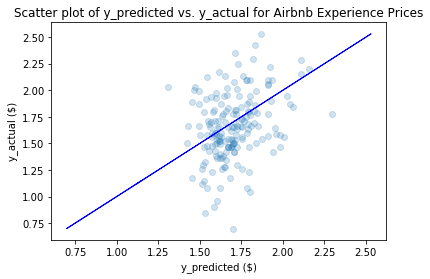

In [270]:
predict = y_predict
actual = y_test
plt.scatter(predict, actual, alpha = 0.2)
plt.title('Scatter plot of y_predicted vs. y_actual for Airbnb Experience Prices')
plt.xlabel('y_predicted ($)')
plt.ylabel('y_actual ($)');
plt.plot(y_test, y_test, color='blue',linewidth=1);

In [14]:
merged_df.describe()

,Durations_spliced_int,Prices_spliced_int,Title_word_length,Ratings_int,filled_na_Ratings_median,Title_character_count,Average_word_length,Tags,Host_photos,Food,Drinks,Languages_cleaned,GroupSize_strip_int
count,890.000000,890.000000,890.000000,565.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.829213,70.531461,5.037079,4.939735,4.961742,28.332584,6.125789,1.458427,4.238202,0.286517,0.492135,1.432584,5.914607
std,1.835637,164.004320,1.678882,0.181682,0.147594,6.769344,2.484636,1.109810,1.427475,0.452388,0.500219,0.984957,2.930678
min,1.000000,1.000000,1.000000,3.000000,3.000000,6.000000,2.400000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,33.000000,4.000000,4.960000,5.000000,25.000000,4.833333,1.000000,5.000000,0.000000,0.000000,1.000000,4.000000
50%,2.000000,50.000000,5.000000,5.000000,5.000000,29.000000,5.666667,1.000000,5.000000,0.000000,0.000000,1.000000,6.000000
75%,3.000000,74.000000,6.000000,5.000000,5.000000,32.000000,6.800000,2.000000,5.000000,1.000000,1.000000,2.000000,8.000000
max,14.000000,4410.000000,20.000000,5.000000,5.000000,90.000000,31.000000,4.000000,5.000000,1.000000,1.000000,6.000000,30.000000


In [17]:
import numpy as np
merged_df['log_price'] = np.log10(merged_df['Prices_spliced_int'])
merged_df

,URLs_x,Categories,Prices,Ratings,Durations,Titles,Ratings_spliced,Durations_spliced,Prices_spliced_from,Prices_spliced_person,...,Tags,GroupSize,Host_photos,Food,Drinks,Languages,GroupSize_strip_string,Languages_cleaned,GroupSize_strip_int,log_price
0,https://www.airbnb.com/experiences/223773?loca...,WORKSHOP,From $85/person,4.99\n203 reviews\n(203),From $85/person · 5 hours,Thai Traditional Yantra Tattoo.,4.99,5 hours,$85/person,$85,...,2.0,Up to 2 people,5,1.0,1.0,1,2,1,2,1.929419
1,https://www.airbnb.com/experiences/358969?loca...,CRAFT CLASS,From $85/person,NaN,From $85/person · 2 hours,Try your hand at the Potters Wheel,NaN,2 hours,$85/person,$85,...,2.0,Up to 4 people,5,1.0,1.0,1,4,1,4,1.929419
2,https://www.airbnb.com/experiences/1140666?loc...,CRAFT CLASS,From $28/person,5.0\n2 reviews\n(2),From $28/person · 2 hours,'Wooden ring' Making Class with Nice VIew,5.0,2 hours,$28/person,$28,...,2.0,Up to 4 people,5,0.0,0.0,2,4,2,4,1.447158
3,https://www.airbnb.com/experiences/522186?loca...,CRAFT CLASS,From $62/person,NaN,From $62/person · 9 hours,Build your own craft and furniture.,NaN,9 hours,$62/person,$62,...,0.0,Up to 10 guests ages 10 and up can attend.,2,1.0,0.0,Languages:\nOffered in English,10,1,10,1.792392
4,https://www.airbnb.com/experiences/1005288?loc...,ART CLASS,From $160/person,NaN,From $160/person · 6 hours,Artistic Flow for your Inner Creative,NaN,6 hours,$160/person,$160,...,3.0,Up to 6 people,5,0.0,1.0,1,6,1,6,2.204120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,https://www.airbnb.com/experiences/809698?loca...,CRAFT CLASS,From $9/person,5.0\n9 reviews\n(9),From $9/person · 1.5 hours,Learn How to Make Paper Flowers,5.0,1.5 hours,$9/person,$9,...,3.0,Up to 10 people,5,0.0,1.0,1,10,1,10,0.954243
886,https://www.airbnb.com/experiences/1212487?loc...,PHOTO WALK,From $53/person,NaN,From $53/person · 2 hours,Private photoshoot in Wrocław,NaN,2 hours,$53/person,$53,...,0.0,Up to 3 guests ages 2 and up can attend.,2,0.0,0.0,Languages:\nOffered in English,3,1,3,1.724276
887,https://www.airbnb.com/experiences/987937?loca...,BOAT RIDE,From $80/person,5.0\n18 reviews\n(18),From $80/person · 6.5 hours,Découverte de la Camargue à la voile,5.0,6.5 hours,$80/person,$80,...,2.0,Up to 6 people,5,0.0,0.0,1,6,1,6,1.903090
888,https://www.airbnb.com/experiences/278438?loca...,PERSONAL STYLING,From $104/person,4.94\n34 reviews\n(34),From $104/person · 4 hours,Get your K-style Hair Perm.,4.94,4 hours,$104/person,$104,...,1.0,Up to 3 people,5,1.0,1.0,1,3,1,3,2.017033


In [370]:
X, y =  merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_character_count',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1).drop('log_price',axis=1), merged_df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=200)
print(X_train)

     Durations_spliced_int  Title_word_length  Average_word_length  Tags  \
762                    2.0                  4             5.000000   1.0   
411                    1.5                  6             4.500000   1.0   
720                    2.0                  9             3.333333   0.0   
165                    4.0                  6             5.166667   1.0   
329                    8.0                  6             5.166667   1.0   
..                     ...                ...                  ...   ...   
810                    2.5                  2             7.500000   1.0   
836                    2.5                  2             6.000000   2.0   
784                    1.0                  3             5.666667   1.0   
617                    3.0                  6             5.833333   2.0   
794                    3.0                  2             9.500000   0.0   

     Host_photos  Food  Drinks  Languages_cleaned  GroupSize_strip_int  \
762          

In [19]:
lm_price = LinearRegression()
lm_price.fit(X_train,y_train)


print(f'Linear Regression val R^2 TRAIN: {lm_price.score(X_train, y_train):.3f}')

Linear Regression val R^2 TRAIN: 0.169


In [20]:
y_predict = lm_price.predict(X_test)
print(f'Linear Regression val R^2 TEST: {lm_price.score(X_test, y_test):.3f}')

Linear Regression val R^2 TEST: 0.016


In [21]:
#normality --> transformations
#polynomial?
#regularization --> model will toss variables for me or 

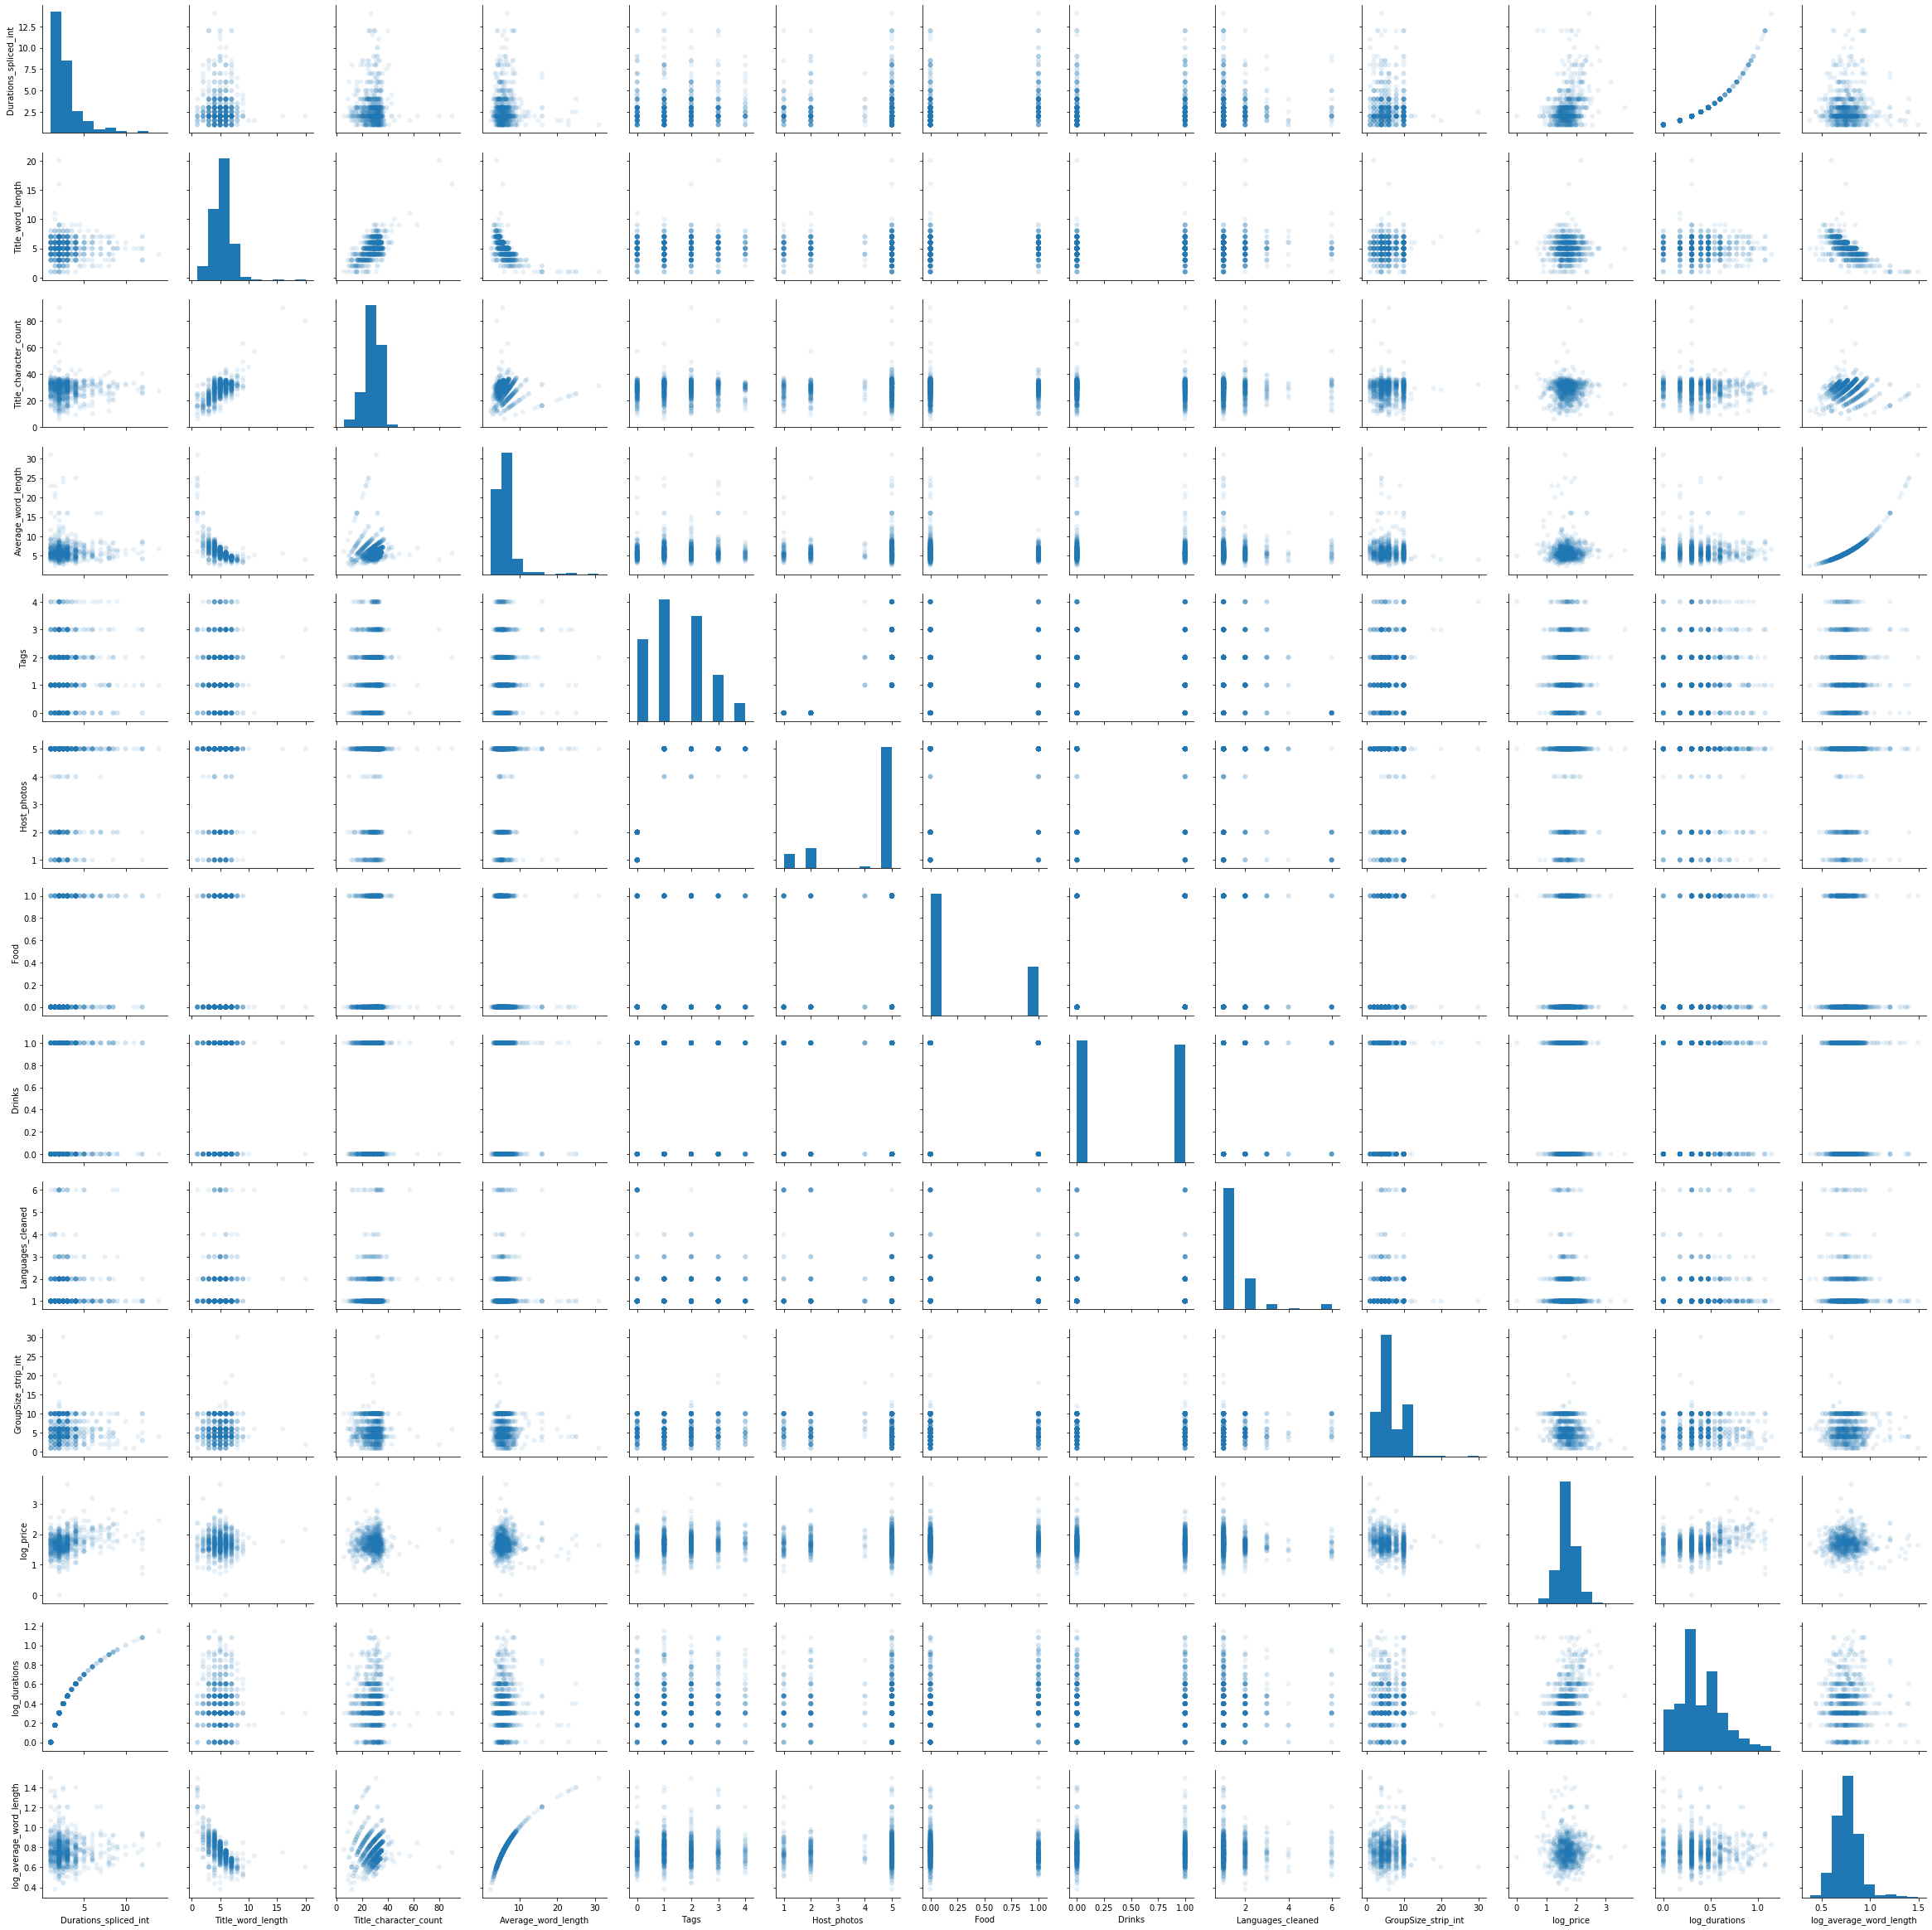

In [159]:
import seaborn as sns
sns.pairplot(merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1), plot_kws=dict(alpha=.1, edgecolor='none'))

In [417]:
#merged_df['log_languages'] = np.log10(merged_df['Languages_cleaned'])
#merged_df.drop('log_languages',axis=1, inplace=True)
merged_df.drop('Dura')describe()

,Durations_spliced_int,Prices_spliced_int,Title_word_length,Ratings_int,filled_na_Ratings_median,Title_character_count,Average_word_length,Tags,Host_photos,Food,Drinks,Languages_cleaned,GroupSize_strip_int,log_price,log_durations,log_average_word_length
count,890.000000,890.000000,890.000000,565.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.829213,70.531461,5.037079,4.939735,4.961742,28.332584,6.125789,1.458427,4.238202,0.286517,0.492135,1.432584,5.914607,1.702346,0.386818,0.764695
std,1.835637,164.004320,1.678882,0.181682,0.147594,6.769344,2.484636,1.109810,1.427475,0.452388,0.500219,0.984957,2.930678,0.309919,0.226503,0.129542
min,1.000000,1.000000,1.000000,3.000000,3.000000,6.000000,2.400000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.380211
25%,2.000000,33.000000,4.000000,4.960000,5.000000,25.000000,4.833333,1.000000,5.000000,0.000000,0.000000,1.000000,4.000000,1.518514,0.301030,0.684247
50%,2.000000,50.000000,5.000000,5.000000,5.000000,29.000000,5.666667,1.000000,5.000000,0.000000,0.000000,1.000000,6.000000,1.698970,0.301030,0.753328
75%,3.000000,74.000000,6.000000,5.000000,5.000000,32.000000,6.800000,2.000000,5.000000,1.000000,1.000000,2.000000,8.000000,1.869232,0.477121,0.832509
max,14.000000,4410.000000,20.000000,5.000000,5.000000,90.000000,31.000000,4.000000,5.000000,1.000000,1.000000,6.000000,30.000000,3.644439,1.146128,1.491362


In [25]:
merged_df['log_durations'] = np.log10(merged_df['Durations_spliced_int'])
merged_df

,URLs_x,Categories,Prices,Ratings,Durations,Titles,Ratings_spliced,Durations_spliced,Prices_spliced_from,Prices_spliced_person,...,GroupSize,Host_photos,Food,Drinks,Languages,GroupSize_strip_string,Languages_cleaned,GroupSize_strip_int,log_price,log_durations
0,https://www.airbnb.com/experiences/223773?loca...,WORKSHOP,From $85/person,4.99\n203 reviews\n(203),From $85/person · 5 hours,Thai Traditional Yantra Tattoo.,4.99,5 hours,$85/person,$85,...,Up to 2 people,5,1.0,1.0,1,2,1,2,1.929419,0.698970
1,https://www.airbnb.com/experiences/358969?loca...,CRAFT CLASS,From $85/person,NaN,From $85/person · 2 hours,Try your hand at the Potters Wheel,NaN,2 hours,$85/person,$85,...,Up to 4 people,5,1.0,1.0,1,4,1,4,1.929419,0.301030
2,https://www.airbnb.com/experiences/1140666?loc...,CRAFT CLASS,From $28/person,5.0\n2 reviews\n(2),From $28/person · 2 hours,'Wooden ring' Making Class with Nice VIew,5.0,2 hours,$28/person,$28,...,Up to 4 people,5,0.0,0.0,2,4,2,4,1.447158,0.301030
3,https://www.airbnb.com/experiences/522186?loca...,CRAFT CLASS,From $62/person,NaN,From $62/person · 9 hours,Build your own craft and furniture.,NaN,9 hours,$62/person,$62,...,Up to 10 guests ages 10 and up can attend.,2,1.0,0.0,Languages:\nOffered in English,10,1,10,1.792392,0.954243
4,https://www.airbnb.com/experiences/1005288?loc...,ART CLASS,From $160/person,NaN,From $160/person · 6 hours,Artistic Flow for your Inner Creative,NaN,6 hours,$160/person,$160,...,Up to 6 people,5,0.0,1.0,1,6,1,6,2.204120,0.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,https://www.airbnb.com/experiences/809698?loca...,CRAFT CLASS,From $9/person,5.0\n9 reviews\n(9),From $9/person · 1.5 hours,Learn How to Make Paper Flowers,5.0,1.5 hours,$9/person,$9,...,Up to 10 people,5,0.0,1.0,1,10,1,10,0.954243,0.176091
886,https://www.airbnb.com/experiences/1212487?loc...,PHOTO WALK,From $53/person,NaN,From $53/person · 2 hours,Private photoshoot in Wrocław,NaN,2 hours,$53/person,$53,...,Up to 3 guests ages 2 and up can attend.,2,0.0,0.0,Languages:\nOffered in English,3,1,3,1.724276,0.301030
887,https://www.airbnb.com/experiences/987937?loca...,BOAT RIDE,From $80/person,5.0\n18 reviews\n(18),From $80/person · 6.5 hours,Découverte de la Camargue à la voile,5.0,6.5 hours,$80/person,$80,...,Up to 6 people,5,0.0,0.0,1,6,1,6,1.903090,0.812913
888,https://www.airbnb.com/experiences/278438?loca...,PERSONAL STYLING,From $104/person,4.94\n34 reviews\n(34),From $104/person · 4 hours,Get your K-style Hair Perm.,4.94,4 hours,$104/person,$104,...,Up to 3 people,5,1.0,1.0,1,3,1,3,2.017033,0.602060


In [ ]:
sns.pairplot(merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_character_count',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1).drop('Durations_spliced_int', axis=1), plot_kws=dict(alpha=.1, edgecolor='none'))

In [26]:
merged_df['log_average_word_length'] = np.log10(merged_df['Average_word_length'])
merged_df

,URLs_x,Categories,Prices,Ratings,Durations,Titles,Ratings_spliced,Durations_spliced,Prices_spliced_from,Prices_spliced_person,...,Host_photos,Food,Drinks,Languages,GroupSize_strip_string,Languages_cleaned,GroupSize_strip_int,log_price,log_durations,log_average_word_length
0,https://www.airbnb.com/experiences/223773?loca...,WORKSHOP,From $85/person,4.99\n203 reviews\n(203),From $85/person · 5 hours,Thai Traditional Yantra Tattoo.,4.99,5 hours,$85/person,$85,...,5,1.0,1.0,1,2,1,2,1.929419,0.698970,0.829304
1,https://www.airbnb.com/experiences/358969?loca...,CRAFT CLASS,From $85/person,NaN,From $85/person · 2 hours,Try your hand at the Potters Wheel,NaN,2 hours,$85/person,$85,...,5,1.0,1.0,1,4,1,4,1.929419,0.301030,0.602060
2,https://www.airbnb.com/experiences/1140666?loc...,CRAFT CLASS,From $28/person,5.0\n2 reviews\n(2),From $28/person · 2 hours,'Wooden ring' Making Class with Nice VIew,5.0,2 hours,$28/person,$28,...,5,0.0,0.0,2,4,2,4,1.447158,0.301030,0.698970
3,https://www.airbnb.com/experiences/522186?loca...,CRAFT CLASS,From $62/person,NaN,From $62/person · 9 hours,Build your own craft and furniture.,NaN,9 hours,$62/person,$62,...,2,1.0,0.0,Languages:\nOffered in English,10,1,10,1.792392,0.954243,0.684247
4,https://www.airbnb.com/experiences/1005288?loc...,ART CLASS,From $160/person,NaN,From $160/person · 6 hours,Artistic Flow for your Inner Creative,NaN,6 hours,$160/person,$160,...,5,0.0,1.0,1,6,1,6,2.204120,0.778151,0.726999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,https://www.airbnb.com/experiences/809698?loca...,CRAFT CLASS,From $9/person,5.0\n9 reviews\n(9),From $9/person · 1.5 hours,Learn How to Make Paper Flowers,5.0,1.5 hours,$9/person,$9,...,5,0.0,1.0,1,10,1,10,0.954243,0.176091,0.636822
886,https://www.airbnb.com/experiences/1212487?loc...,PHOTO WALK,From $53/person,NaN,From $53/person · 2 hours,Private photoshoot in Wrocław,NaN,2 hours,$53/person,$53,...,2,0.0,0.0,Languages:\nOffered in English,3,1,3,1.724276,0.301030,0.812913
887,https://www.airbnb.com/experiences/987937?loca...,BOAT RIDE,From $80/person,5.0\n18 reviews\n(18),From $80/person · 6.5 hours,Découverte de la Camargue à la voile,5.0,6.5 hours,$80/person,$80,...,5,0.0,0.0,1,6,1,6,1.903090,0.812913,0.632023
888,https://www.airbnb.com/experiences/278438?loca...,PERSONAL STYLING,From $104/person,4.94\n34 reviews\n(34),From $104/person · 4 hours,Get your K-style Hair Perm.,4.94,4 hours,$104/person,$104,...,5,1.0,1.0,1,3,1,3,2.017033,0.602060,0.643453


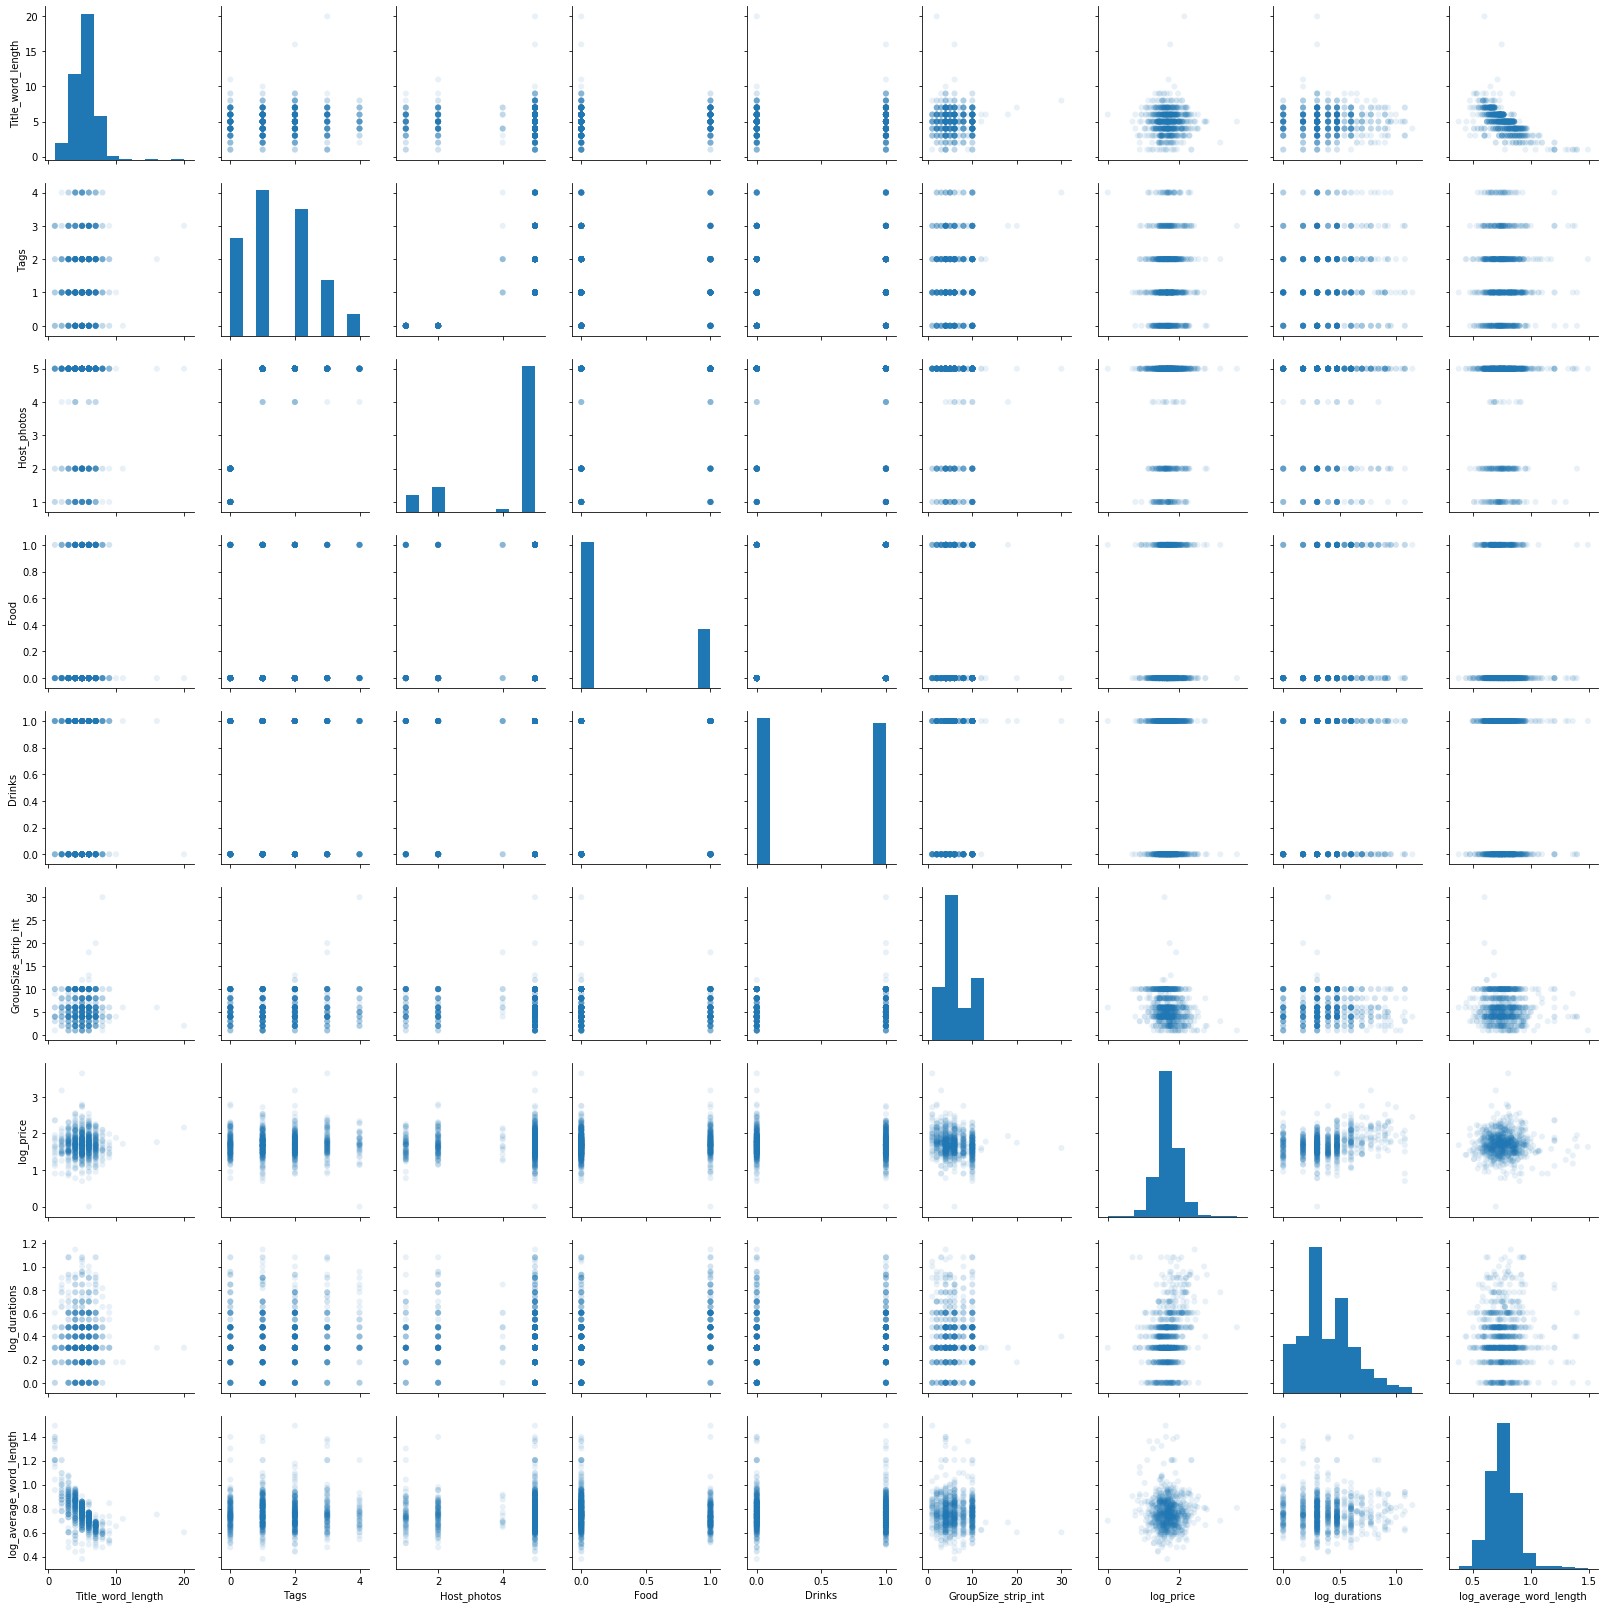

In [27]:
sns.pairplot(merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_character_count',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1).drop('Durations_spliced_int', axis=1).drop('Languages_cleaned', axis=1).drop('Average_word_length',axis=1), plot_kws=dict(alpha=.1, edgecolor='none'))

# RE-RUN for LASSO 

In [407]:
X, y =  merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_word_length',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1).drop('Durations_spliced_int', axis=1).drop('Languages_cleaned', axis=1).drop('Average_word_length',axis=1).drop('log_price',axis=1), merged_df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)
print(X_train)
print(y_train)

     Title_character_count  Tags  Host_photos  Food  Drinks  \
777                     30   4.0            5   0.0     1.0   
851                     33   2.0            5   1.0     1.0   
708                     23   1.0            5   0.0     0.0   
152                     19   0.0            1   0.0     1.0   
562                     19   1.0            5   0.0     1.0   
..                     ...   ...          ...   ...     ...   
855                     35   1.0            4   0.0     1.0   
871                     31   3.0            5   1.0     1.0   
835                     16   2.0            5   0.0     0.0   
792                     33   1.0            5   1.0     1.0   
520                     31   1.0            5   0.0     0.0   

     GroupSize_strip_int  log_durations  log_average_word_length  
777                    4       0.397940                 0.698970  
851                    6       0.544068                 0.740363  
708                    4       0.176091   

In [29]:
lm_price = LinearRegression()
lm_price.fit(X_train,y_train)


print(f'Linear Regression val R^2 TRAIN: {lm_price.score(X_train, y_train):.3f}')

Linear Regression val R^2 TRAIN: 0.147


In [30]:
y_predict = lm_price.predict(X_test)
print(f'Linear Regression val R^2 TEST: {lm_price.score(X_test, y_test):.3f}')

Linear Regression val R^2 TEST: 0.071


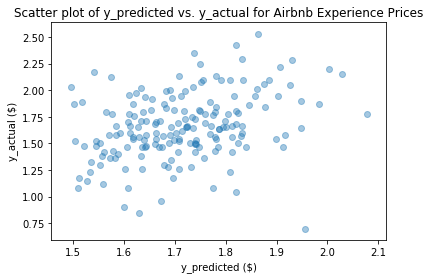

In [31]:
predict = y_predict
actual = y_test
plt.scatter(predict, actual, alpha = 0.4)
plt.title('Scatter plot of y_predicted vs. y_actual for Airbnb Experience Prices')
plt.xlabel('y_predicted ($)')
plt.ylabel('y_actual ($)');


In [ ]:
#Dropping extranneous variables 
#merged_df['log_title_character_count'] = np.log(merged_df['Title_character_count'])
# X_drop_test, y_drop_test =  merged_df.select_dtypes(exclude=['object']).drop('Ratings_int',axis=1).drop('Title_character_count',axis=1).drop('log_title_character_count',axis=1).drop('filled_na_Ratings_median',axis=1).drop('Prices_spliced_int',axis=1).drop('Durations_spliced_int', axis=1).drop('Languages_cleaned', axis=1).drop('Average_word_length',axis=1).drop('Title_word_length',axis=1).drop('Tags',axis=1).drop('Host_photos',axis=1).drop('log_average_word_length',axis=1).drop('log_price',axis=1), merged_df['log_price']
# X_train, X_test, y_train, y_test = train_test_split(X_drop_test, y_drop_test, test_size=.2, random_state=10)
print(X_train)

lm_price_minus_features = LinearRegression()
lm_price_minus_features.fit(X_train,y_train)


print(f'Linear Regression val R^2 TRAIN: {lm_price_minus_features.score(X_train, y_train):.3f}')

y_predict = lm_price_minus_features.predict(X_test)
print(f'Linear Regression val R^2 TEST: {lm_price_minus_features.score(X_test, y_test):.3f}')

predict = y_predict
actual = y_test
plt.scatter(predict, actual, alpha = 0.4)
plt.title('Scatter plot of y_predicted vs. y_actual for Airbnb Experience Prices')
plt.xlabel('y_predicted ($)')
plt.ylabel('y_actual ($)');

#print(f'Linear Regression val ADJUSTED R^2 TEST: {adj_r2_score(lm_price_minus_features, X_train, y_train):.3f}')
print(f'Linear Regression val ADJUSTED R^2 TEST: {adj_r2_score(lm_price_minus_features, y_test, y_predict):.3f}')

In [ ]:
from sklearn.preprocessing import StandardScaler
#to center the distribution and (to smaller extent, scale the features to the similar units)
#train,validate go into kfold --> train and validate go into kfolds
std = StandardScaler()
std.fit(X_train)


In [ ]:
#MAE - 
#R^2 - 0.8 - on average, I am off by $100 but typical car costs in $1000s (model with error about $100) --vs. error $50K
#when convert to $ amount: can relate
#y and y_predict: actual $ amount vs. predicted; $30 K vs. predict $31 K --> grab y and y_predict; subtract y-y_pred
#error: $1000-$1000 --> average = $0 (errored above and below); absolute value of $1000 + $1000 --> average; on avg, have error of $1000



# Polynomial

In [222]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# def plot_approximation(lm_price, ax, label=None):
#     """Plot the approximation of ``est`` on axis ``ax``. """
#     ax.plot(X_test, y_test, label='ground truth', color='green')
#     ax.scatter(X_test, y_test, s=1)
#     ax.plot(X_test, lm_price.predict(X_test[:, np.newaxis]), color='red', label=label)
#     ax.set_ylim((-2, 2))
#     ax.set_xlim((0, 1))
#     ax.set_ylabel('y')
#     ax.set_xlabel('x')
#     ax.legend(loc='upper right',frameon=True)
    
# # Set up the plot
# fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
lm_price_polynom_two = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit our model to the training data
#already did (lm_price.fit(X_train,y_train))
# Plot the results
#plot_approximation(lm_price_polynom_two, ax, label='degree=%d' % degree)
lm_price_polynom_two_trained = lm_price_polynom_two.fit(X_train,y_train)
print(f'Linear Regression val R^2 TRAIN: {lm_price_polynom_two_trained.score(X_train, y_train):.3f}')
y_predict = lm_price_polynom_two_trained.predict(X_test)
print(f'Linear Regression val R^2 TEST: {lm_price_polynom_two_trained.score(X_test, y_test):.3f}')


#transform 1-5 range that maps well onto distribution of data: ordinal logistic regression (similar to linear, but have real value and slice between smaller ranges)
#Heckman

#predicted (x)-axis, actual (y-axis) --vs. residuals for DS
#model.predict(X) --> predicted y values, take those values and add as column in df (predicted x axis, y actual on y )
#add line where y = x
#color categorical variables 

Linear Regression val R^2 TRAIN: 0.222
Linear Regression val R^2 TEST: 0.045


In [ ]:

degree = 3

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features

lm_price_polynom_three = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit our model to the training data
#already did (lm_price.fit(X_train,y_train))
# Plot the results
#plot_approximation(lm_price_polynom_three, ax, label='degree=%d' % degree)
lm_price_polynom_three_trained = lm_price_polynom_three.fit(X_train,y_train)
print(f'Linear Regression val R^2 TRAIN: {lm_price_polynom_three_trained.score(X_train, y_train):.3f}')
    
y_predict = lm_price_polynom_three_trained.predict(X_test)
print(f'Linear Regression val R^2 TEST: {lm_price_polynom_three_trained.score(X_test, y_test):.3f}')

In [ ]:
from sklearn import metrics
def adj_r2_score(model, y, yhat):
    """Adjusted R squared --put fitted linear model, y value, estimated y value in order"""
    #adj = 1 - float(len(y)-1)/(len(y)-len(model.coef_)-1)*(1 - metrics.r2_score(y,yhat))
    adj = 1 - float(len(y)-1)/(len(y)-(len(model.coef_)-1)-1)*(1 - metrics.r2_score(y,yhat))
    return adj

adj_r2_score(lm_price, y_test, y_predict)
    

# Pipeline

In [386]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


#, StandardScaler(),
lm_price_pipeline = make_pipeline(PolynomialFeatures(3), StandardScaler(), RidgeCV(cv=5,alphas=(0.01,0.1,1,10,100,1000,10000)))
#lm_price_pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler(), LassoCV(cv=5,n_alphas=4))
lm_price_pipeline_trained = lm_price_pipeline.fit(X_train,y_train)
print(f'Pipeline val R^2 train: {lm_price_pipeline.score(X_train, y_train):.3f}')
print(list(zip(X_train.columns, lm_price_pipeline.steps[2][1].coef_)))
print(f'Pipeline alpha: {lm_price_pipeline.steps[2][1].alpha_:.3f}')
print(lm_price_pipeline.steps[2][1].alphas)
#print(len(lm_price_pipeline_trained.steps[2][1].alphas))
#print(lm_price_polynom_two_lasso.steps[1][1].score(X_train,y_train))
y_predict_pipeline = lm_price_pipeline_trained.predict(X_test)
print('MSE '+str(mean_squared_error(y_test, y_predict_pipeline)))
#lm_price_pipeline.score(X_test,y_test)


#how would result dep on log duration, if everything else remained same

Pipeline val R^2 train: 0.155
[('Title_character_count', 0.0), ('Tags', 0.0027239529666672944), ('Host_photos', 0.001088474079564933), ('Food', 0.0006685293816129448), ('Drinks', -0.0007548815724892597), ('GroupSize_strip_int', -0.001384699567494244), ('log_durations', -0.007138718087720846), ('log_average_word_length', 0.007663222025274212)]
Pipeline alpha: 1000.000
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
MSE 0.06323874526271323


/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


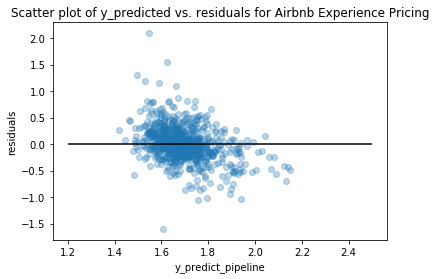

In [387]:
residual = y_train - y_predict_pipeline_train
residual

plt.scatter(y_predict_pipeline_train,residual, alpha = 0.3)
plt.hlines (0, 1.2, 2.5)
plt.title('Scatter plot of y_predicted vs. residuals for Airbnb Experience Pricing')
plt.xlabel('y_predict_pipeline')
plt.ylabel('residuals');

In [ ]:
from sklearn.linear_model import RidgeCV
regularize_ridge = RidgeCV(cv=5).fit(X_train, y_train)
print(regularize_ridge.score(X_train, y_train)) 
print(regularize_ridge.coef_)
print(list(zip(X_train.columns, regularize_ridge.coef_)))
print(regularize_ridge.alphas)
print(regularize_ridge.alpha_)
#low alpha means not much regularization 
#interactions

#plot residuals (actual minus predicted)--on y-axis vs. 1 continuous feature --on x-axis --> look for patterns (if need interactions or other features)
#log(y vs. )

In [ ]:
#kfold on x and y --> if feed into diff algorithms, can use same kfold separations
#vs. test --> don't just do cv on each --> #kfold just once, then set random seed, etc. --> test diff algorithms, can always use same kfold 
#start with ridgecv and lassocv --> here are alphas we want to use
#alphas = loss function, SSR + penalty + lambda (ex. Ridge = sum(y-y_hat)+lambda*Sum(beta^2) --each obs/prediction (residuals) + parameter penalty) = how much we penalize
#try increasing values of alpha to zero out features --> number of lambda values to try 
#lambda = how much charging for complexity: large value --> complexity is very expensive, but we are pushing for everything to be very small
#complexity: trade-off; high complexity leads to overfitting 
#want MSE to be small
#can get r2 or MSE --> MSE on validation, as turn regularization dial goes back and forth --> may be 1 case for lasso vs. ridge --> pick model with lower MSE, prefer that model
#mvp: r2 is like MSE.. not great effect on price, or data can be very noise.. sometimes can't do anything (doesn't matter if noisy process: matters if can do process and understand)
#if doing CV: validation set = holdout set 
#if underfitting, more data, more features; transform, dummy variables

#at every step: value 
#if MSE too high? after CV, do feature engineering 

#CV and linear model and regularization 
#folds = 
#can reuse same folds--> more consistent 

In [414]:
import statsmodels.api as sm
X_train_forSM = sm.add_constant(X_train)
mod = sm.OLS(y_train,X_train_forSM)
fit = mod.fit()
fit.summary()

/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     12.97
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.59e-17
Time:                        18:49:30   Log-Likelihood:                -120.28
No. Observations:                 712   AIC:                             258.6
Df Residuals:                     703   BIC:                             299.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.6682      0.089     18.812      0.000       1.494       1.842
Title_character_count       0.0022      0.002      1.398      0.162      -0.001       0.005
Tags                        0.0037      0.014      0.273      0.785      -0.023       0.030
Host_photos                -0.0031      0.011     -0.289      0.773      -0.024       0.018
Food                       -0.0231      0.026     -0.901      0.368      -0.074       0.027
Drinks                     -0.0401      0.022     -1.840      0.066      -0.083       0.003
GroupSize_strip_int        -0.0215      0.004     -5.929      0.000      -0.029      -0.014
log_durations               0.3895      0.050      7.718      0.000       0.290       0.489
log_average_word_length    -0.0310      0.084     -0.370      0.711      -0.196       0.134
==============================================================================
Omnibus:                       67.432   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.095
Skew:                           0.060   Prob(JB):                     6.57e-89
Kurtosis:                       6.698   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df=pd.DataFrame([[1, 2, 8],[3, 4, 8], [5, 1, 8]], columns=['A', 'B', 'C'])
df

In [ ]:
df.loc[:, ['A', 'B']] = df.loc[:, ['A', 'B']].replace([1, 3, 2], [3, 6, 7])

In [ ]:
df

In [ ]:
from sklearn.linear_model import Lasso
#from sklearn.cross_validation import KFold --cross_validation has been changed to model_selection
from sklearn.model_selection import KFold



# N = len(y_train)
    
# #tune the lambda parameter by applying k-fold cross validation
# kf = KFold(n_splits=5)  #produce the k folds
# print(kf)

# Lambda = np.arange(0.001, 1.0, 0.001)  #a list of lambdas
# Prediction_error = []  #an empty list to hold the prediction error

# for l in Lambda:  #loop over lambdas
#     pe = 0.0  #initialize prediction error
#     for train_index, test_index in kf.split(N):  #loop over the folds
#         X_train, X_test = X[train_index], X[
#             test_index]  #create training and test independent variable data
#         y_train, y_test = y[train_index], y[
#             test_index]  #create training and test dependent variable data

#         model = Lasso(l)  #create the model object
#         results = model.fit(X_train, y_train)  #fit the model
#         pe += sum(
#             (model.predict(X_test) - y_test)
#             **2)  #predict the test data, compute the error, and add to total
#     Prediction_error.append(pe)  #append the prediction error

# # #run the lasso:
# # #Lambda = sum(((1.0/np.array(Prediction_error))/sum(1.0/np.array(Prediction_error)))*np.array(Lambda))    #compute lambda as the weighted average
# # model = Lasso(Lambda[Prediction_error.index(
# #     min(Prediction_error))])  #generate a model object
# # results = model.fit(X, y)  #fit the model
# # for i, j in zip(results.coef_, data[2]):  #loop over results
# #     print('Lasso:', round(i, 4), '    True',
# #           round(j, 4))  #print and compare with the truth

In [ ]:
# regularize_lasso = LassoCV(cv=5, random_state=0,n_alphas=100).fit(X_train, y_train)
#print(regularize_lasso.score(X_train, y_train)) 
# print(regularize_lasso.coef_)
# print(list(zip(X_train.columns, regularize_lasso.coef_)))
# print(regularize_lasso.alpha_)
# print(regularize_lasso.alphas)
#regularize_lasso.predict(X_test).score(X_train, y_train)
#array([-78.4951...])


#stdscaler --> Lasso --> training lasso based on std scaler; testing on training data

In [ ]:
#loge or log10

#very valuable if can recommend price for successful business--but need data about the business, the successes and failures
#survival bias 

In [ ]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
    
#interp coefficients: if linear --> coeff 3: increase continuous variable by 1 --> 3x incr price.. but when do normalization of x (standard scaler)? --> ex. (coef minus sigma) over mu, or some formula; but when take (log(y)): y = e^(B0+B1x1, etc.), and polynomial gets more complex
#say have property in mind, grab prediction; add microwave, figure out features actionable by the owner --> play with those for that specific house --> app can say prediction for house: here are actionable things you can do to increase value [how much can i rent airbnb, and what can i do to rent for more?]
#error of your prediction = RMSE (if 1 is good, other is good) 
#found conclusion that this affects --> actionable for you to do: are there things you can do to affect homelessness?